<a href="https://colab.research.google.com/github/iliya1984/DevML/blob/main/computer_vision/image_classification/homer_bart_classification_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network for image classification

### Importing the libraries

In [1]:
import cv2
import numpy as np
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')

tf.__version__

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'2.15.0'

In [2]:
%run '/content/drive/MyDrive/Workspace/Computer Vision/cv_common.ipynb'

Common library was successfully loaded


### Extracting pixels from images

In [3]:
zip_file_path = f'{datasets_directory}/Simpsons/simpsons.zip'
working_directory = './content/simpsons'
data_extract_path = f'{working_directory}/datasets'
train_set_path = f'{data_extract_path}/simpsons/training_set'
test_set_path = f'{data_extract_path}/simpsons/test_set'

image_height = 128
image_width = 128

In [4]:
create_empty_directory(data_extract_path)
zipe_file = zipfile.ZipFile(file=zip_file_path, mode = 'r')
zipe_file.extractall(data_extract_path)
zipe_file.close()

./content/simpsons/datasets directory already exists


In [5]:
def get_labels(images):
  labels = []

  for image_info in images:
    label = image_info[2]
    labels.append(label)

  return np.asarray(labels)

def get_image_vectors(images):
  vectors = []

  for image_info in images:
    vector = image_info[1]
    vectors.append(vector)

  return np.asarray(vectors)

def load_images_and_classes(directory, images, preview_images=False):

  files = [os.path.join(directory, f) for f in sorted(os.listdir(directory))]
  #print(files)

  preview_index = 0
  for image_path in files:
    #print(image_path)
    try:
      image = cv2.imread(image_path)
      (H, W) = image.shape[:2]
    except:
      print('Image read error')
      continue

    image = cv2.resize(image, (image_width, image_height))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if preview_images and preview_index < 1:
      cv2_imshow(image)
      preview_index += 1

    #Converting image matrix into vector
    vector = image.ravel()
    #print(image.shape)

    image_name = os.path.basename(os.path.normpath(image_path))
    if image_name.startswith('b'):
      class_name = 0
    else:
      class_name = 1

    images.append((image, vector, class_name))
    #print(class_name)

  return images

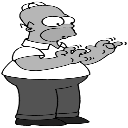

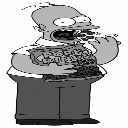

In [6]:
#Loading Homer's images and labels
train_set = load_images_and_classes(f'{train_set_path}/homer', [], preview_images=True)
test_set = load_images_and_classes(f'{test_set_path}/homer', [], preview_images=True)

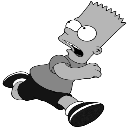

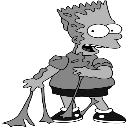

In [7]:
#Loading Bart's images and labels
train_set = load_images_and_classes(f'{train_set_path}/bart', train_set, preview_images=True)
test_set = load_images_and_classes(f'{test_set_path}/bart', test_set, preview_images=True)

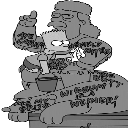

In [8]:
#Shuffling training set
random.shuffle(train_set)
cv2_imshow(train_set[0][0])


<BarContainer object of 2 artists>

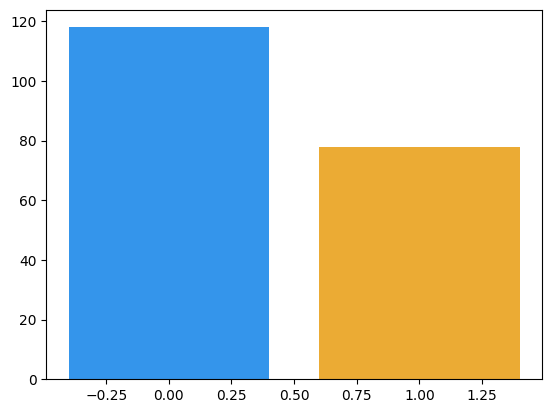

In [9]:
train_labels = get_labels(train_set)
label_counts = pd.Series(train_labels).value_counts()
plt.bar(label_counts.index.values, label_counts.values, color=['#3495eb', '#ebab34'])


### Normalizing the data

In [10]:
train_vectors = get_image_vectors(train_set)

scaler = MinMaxScaler()
train_vectors = scaler.fit_transform(train_vectors)

### Building and training the neural network

In [20]:
net = Sequential()
net.add(Dense(input_shape=(16384,), units=8193, activation='relu'))
net.add(Dense(units=8193, activation = 'relu'))
net.add(Dense(units = 1, activation = 'sigmoid'))

In [21]:
net.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8193)              134242305 
                                                                 
 dense_4 (Dense)             (None, 8193)              67133442  
                                                                 
 dense_5 (Dense)             (None, 1)                 8194      
                                                                 
Total params: 201383941 (768.22 MB)
Trainable params: 201383941 (768.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# https://keras.io/api/optimizers/
# https://keras.io/api/losses/
net.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
history = net.fit(train_vectors, train_labels, epochs=40)

Epoch 1/40
7/7 [==============================] - 3s 71ms/step - loss: 90.2926 - accuracy: 0.5459
Epoch 2/40
7/7 [==============================] - 0s 67ms/step - loss: 3.8941 - accuracy: 0.5204
Epoch 3/40
7/7 [==============================] - 0s 64ms/step - loss: 3.3701 - accuracy: 0.4898
Epoch 4/40
7/7 [==============================] - 0s 71ms/step - loss: 1.7668 - accuracy: 0.5765
Epoch 5/40
7/7 [==============================] - 0s 68ms/step - loss: 0.7633 - accuracy: 0.5306
Epoch 6/40
7/7 [==============================] - 0s 66ms/step - loss: 0.6268 - accuracy: 0.6684
Epoch 7/40
7/7 [==============================] - 1s 73ms/step - loss: 0.6853 - accuracy: 0.5408
Epoch 8/40
7/7 [==============================] - 0s 61ms/step - loss: 0.6469 - accuracy: 0.5867
Epoch 9/40
7/7 [==============================] - 0s 61ms/step - loss: 0.7016 - accuracy: 0.5357
Epoch 10/40
7/7 [==============================] - 0s 58ms/step - loss: 0.6981 - accuracy: 0.6224
Epoch 11/40
7/7 [===========

### Evaluating the neural network

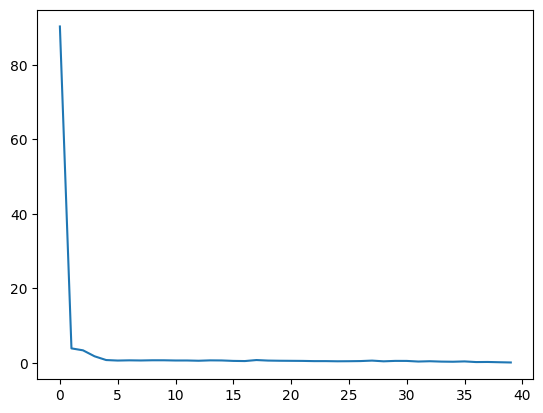

In [24]:
plt.plot(history.history['loss']);

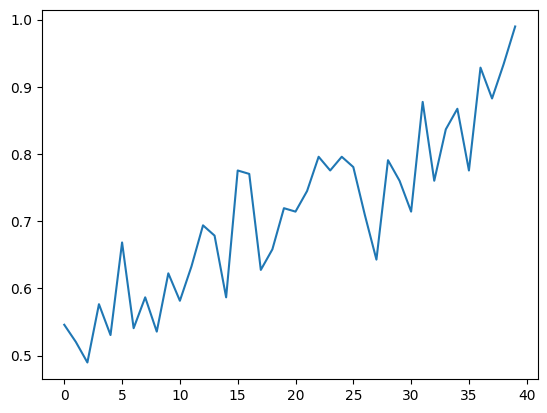

In [25]:
plt.plot(history.history['accuracy']);

In [26]:
test_labels = get_labels(test_set)
test_vectors = get_image_vectors(test_set)

In [27]:
predictions = net.predict(test_vectors)

3/3 [==============================] - 0s 6ms/step


In [28]:
predictions = (predictions > 0.5)
accuracy_score(test_labels, predictions)

0.7671232876712328